# **NETFLIX DATA ANALYSIS**

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [3]:
df=pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
# size of table
df.shape

(8790, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
# show all columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
df.describe(include= 'all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s8786,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [8]:
# checking null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

### Data Cleaning

In [9]:
# Remove duplicates
df=df.drop_duplicates()

In [10]:
# Convert Date Column into date time format
df["date_added"]= pd.to_datetime(df['date_added'], errors='coerce')

In [11]:
df['year_added']= df['date_added'].dt.year
df['month_added']= df['date_added'].dt.month_name()

### Feature Engineering

In [12]:
# count genres 
df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(',')))

In [13]:
# convert duration text to float 
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

In [14]:
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])

### Exploratory Data Analysis (EDA)

In [15]:
# Movies vs TV Shows
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

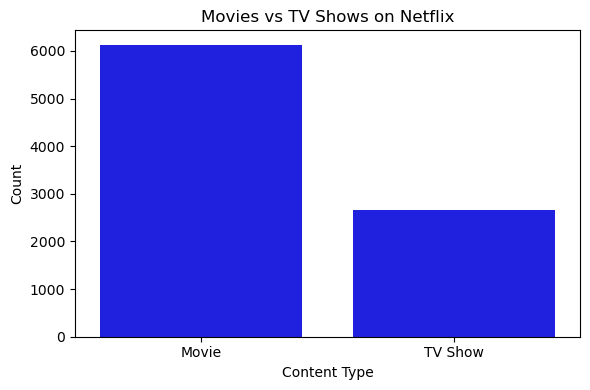

In [16]:
counts = df['type'].value_counts().reset_index()
counts.columns = ['type', 'count']

plt.figure(figsize=(6,4))
sns.barplot(x='type', y='count', data=counts, color='blue')

plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

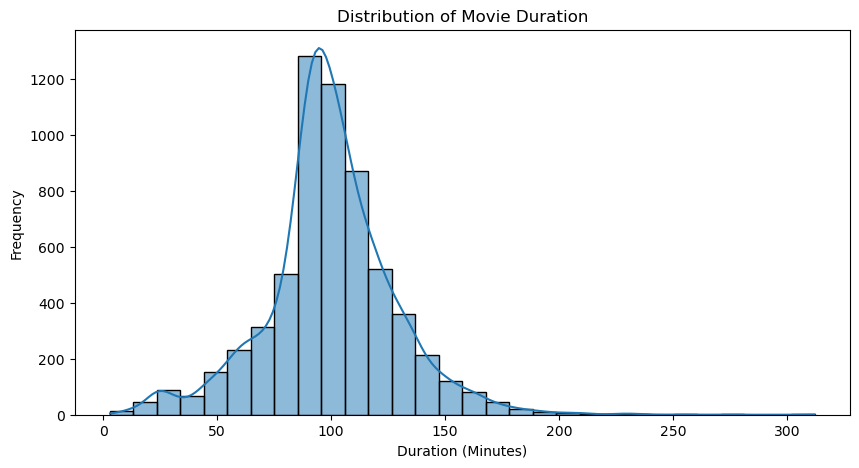

In [17]:
# Movie Duration Distribution
movies = df[df['type'] == 'Movie']

plt.figure(figsize=(10,5))
sns.histplot(movies['duration_minutes'], bins=30, kde=True)
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()

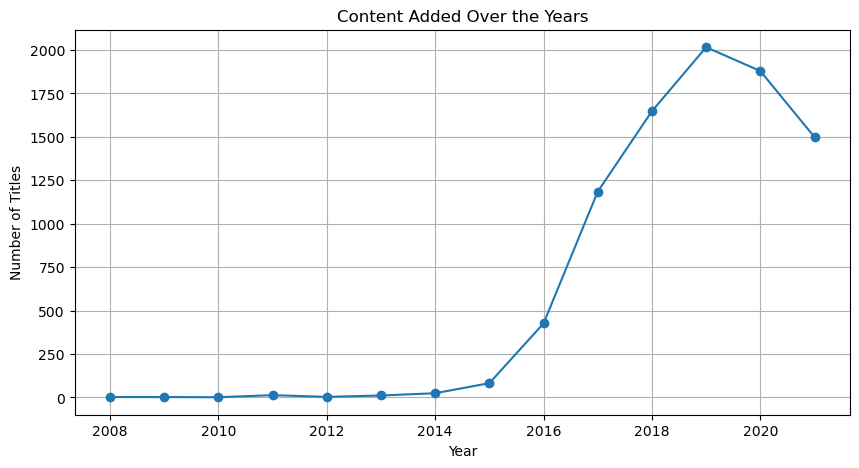

In [18]:
# Content Added Over the Years
yearly = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
yearly.plot(kind='line', marker='o')
plt.title("Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

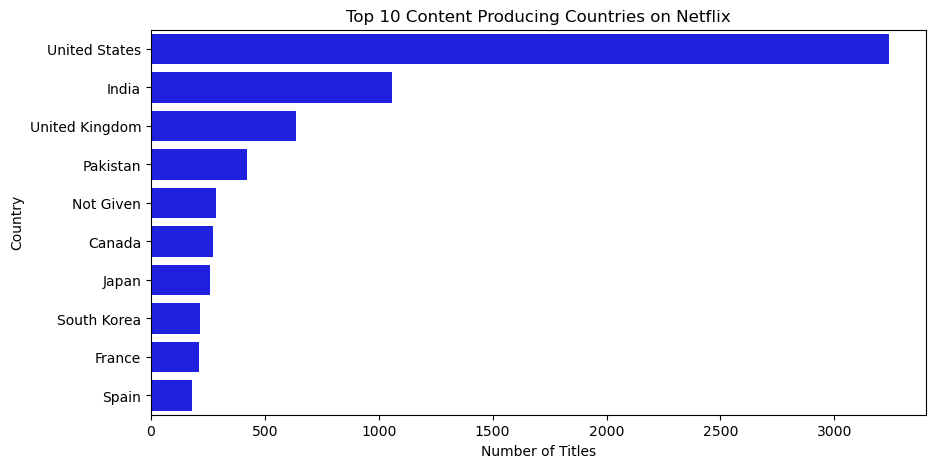

In [19]:
# Top 10 Content Producing Countries
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, color='blue')
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

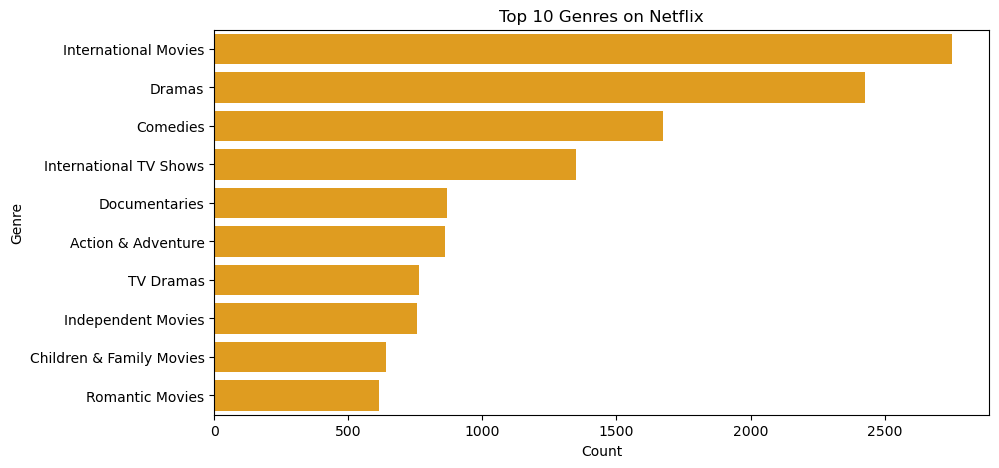

In [20]:
# Top 10 Genres on Netflix
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, color='orange')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

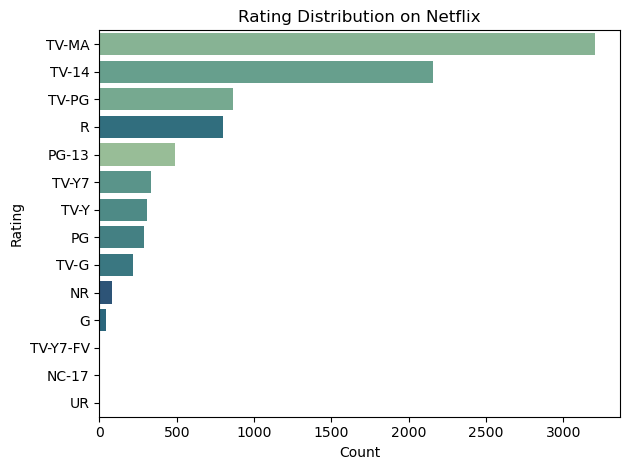

In [ ]:
# Rating distribution
sns.countplot(
    y='rating',
    data=df,
    order=df['rating'].value_counts().index,
    hue='rating',        
    palette="crest",
    legend=False         
)

plt.title("Rating Distribution on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

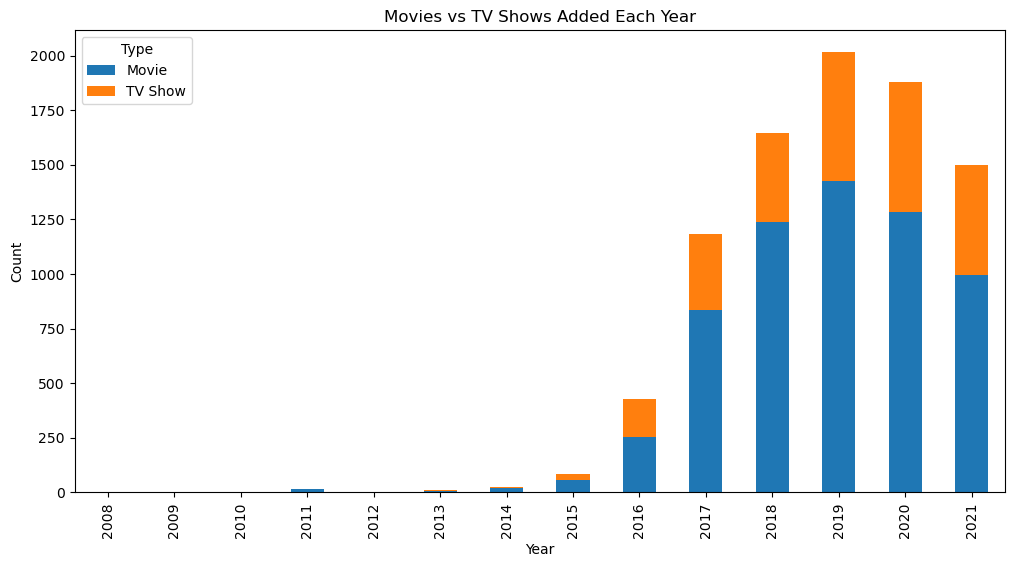

In [22]:
# Movies vs TV Shows by Year
year_type = df.pivot_table(index='year_added', columns='type', values='show_id', aggfunc='count')

year_type.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Movies vs TV Shows Added Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show()

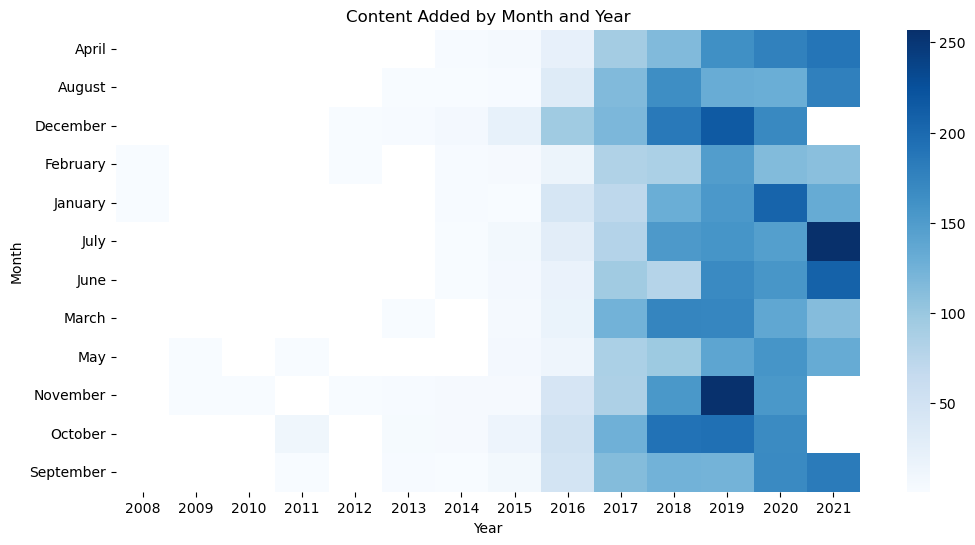

In [23]:
# Month vs Year Content Added
pivot = df.pivot_table(index='month_added', columns='year_added', values='show_id', aggfunc='count')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='Blues')
plt.title("Content Added by Month and Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

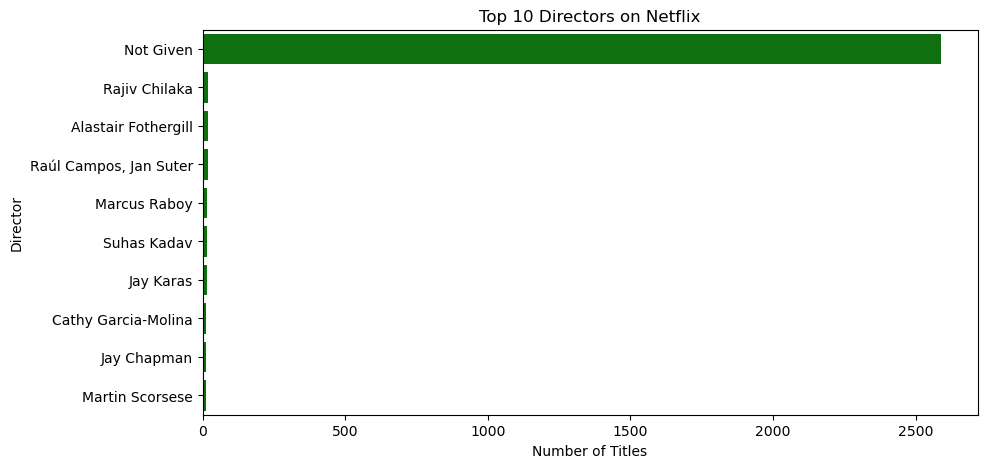

In [24]:
# Top 10 directors on netflix
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, color='green')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

In [25]:
# Top 10 movie genres on netflix
# Filter only Movies
movies = df[df['type'] == 'Movie']

# Split genres and count
top_movie_genres = (
    movies['listed_in']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
)

print("Top 10 Movie Genres:")
print(top_movie_genres)

Top 10 Movie Genres:
listed_in
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64


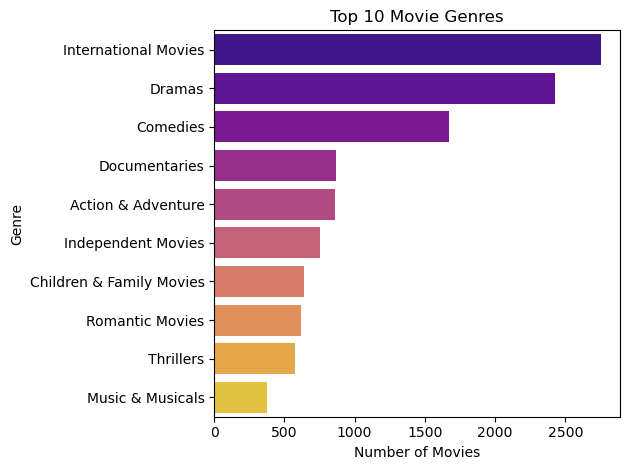

In [ ]:
sns.barplot(
    x=top_movie_genres.values,
    y=top_movie_genres.index,
    hue=top_movie_genres.index,   
    palette="plasma",
    legend=False                 
)

plt.title("Top 10 Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [27]:
# Top 10 TV Shows on netflix
# Filter only TV Shows
tv_shows = df[df['type'] == 'TV Show']

# Split genres and count
top_tv_genres = (
    tv_shows['listed_in']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
)

print("\nTop 10 TV Show Genres:")
print(top_tv_genres)


Top 10 TV Show Genres:
listed_in
International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               174
Name: count, dtype: int64


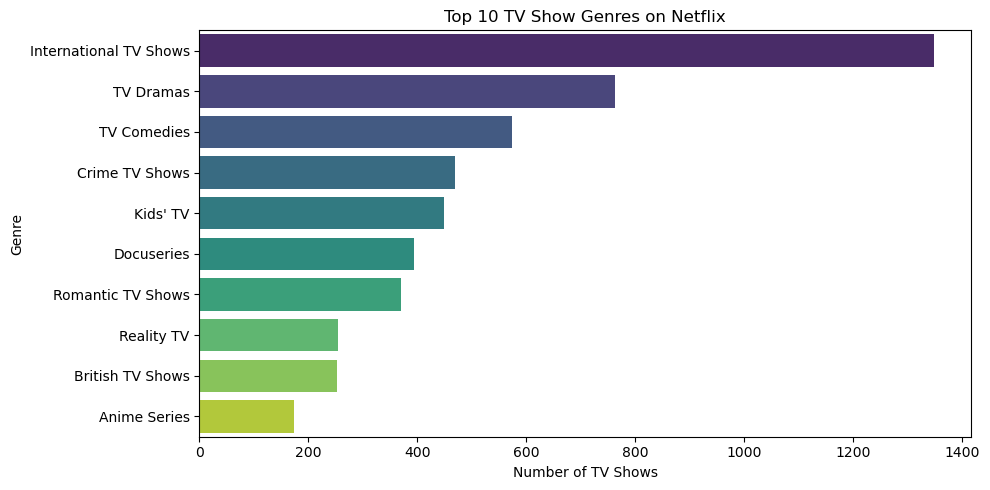

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_tv_genres.values, y=top_tv_genres.index ,hue=top_tv_genres.index , palette="viridis" )
plt.title("Top 10 TV Show Genres on Netflix")
plt.xlabel("Number of TV Shows")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()